In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the Titanic dataset
data = pd.read_csv('tested.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

In [5]:
print(data.isnull().sum())

Survived       0
Pclass         0
Sex            0
Age           86
SibSp          0
Parch          0
Fare           1
Embarked_Q     0
Embarked_S     0
dtype: int64


In [6]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)

In [7]:
print(data.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64


In [8]:
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.363636,2.265550,0.363636,29.599282,0.447368,0.392344,35.576535
std,0.481622,0.841838,0.481622,12.703770,0.896760,0.981429,55.850103
min,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,0.000000,27.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,35.750000,1.000000,0.000000,31.471875
max,1.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
data['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

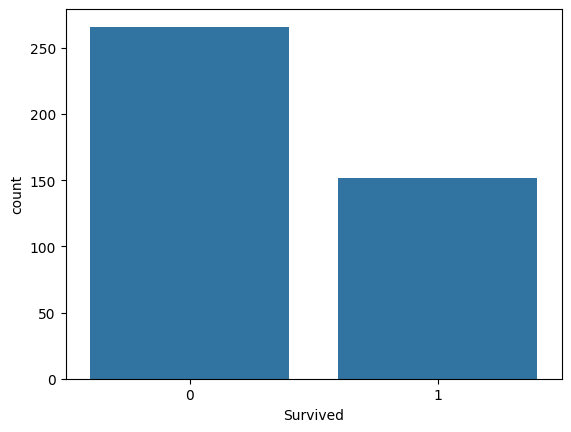

In [10]:
# making a count plot for "Survived" column
sns.countplot(data = data,x='Survived')

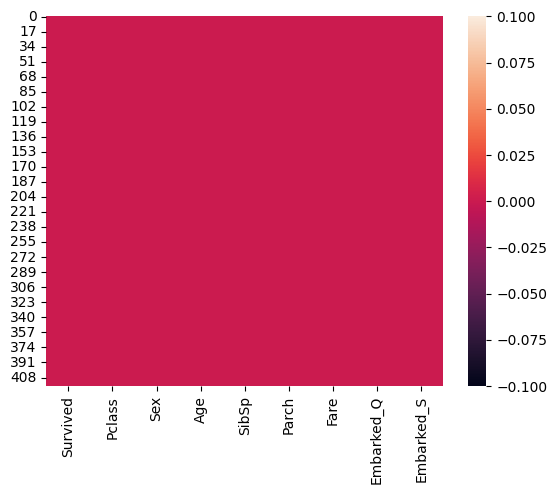

In [11]:
sns.heatmap(data.isnull());

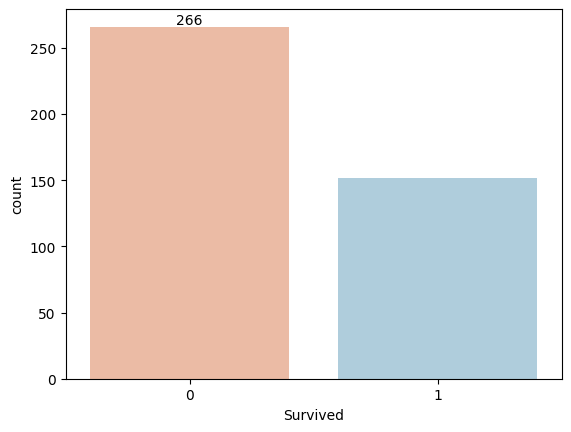

In [12]:
ax = sns.countplot(x=data['Survived'], palette='RdBu')
ax.bar_label(ax.containers[0])
plt.show()

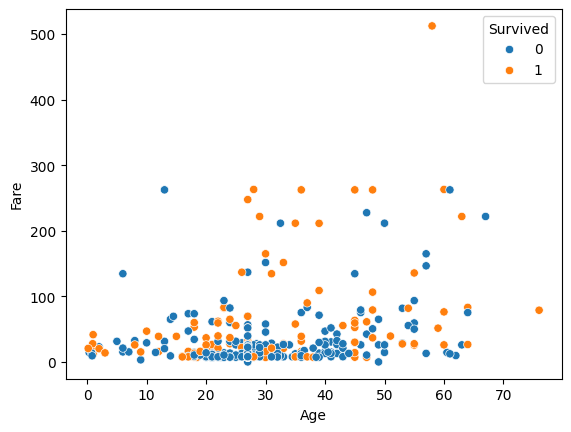

In [13]:
sns.scatterplot(data=data, x='Age', y='Fare', hue='Survived')
plt.show()

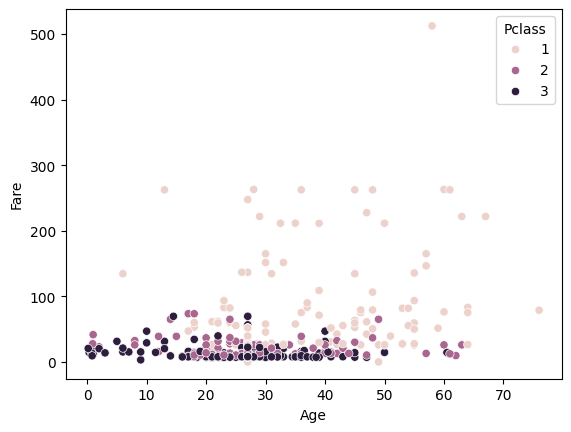

In [14]:
sns.scatterplot(data=data, x='Age', y='Fare', hue='Pclass')
plt.show()

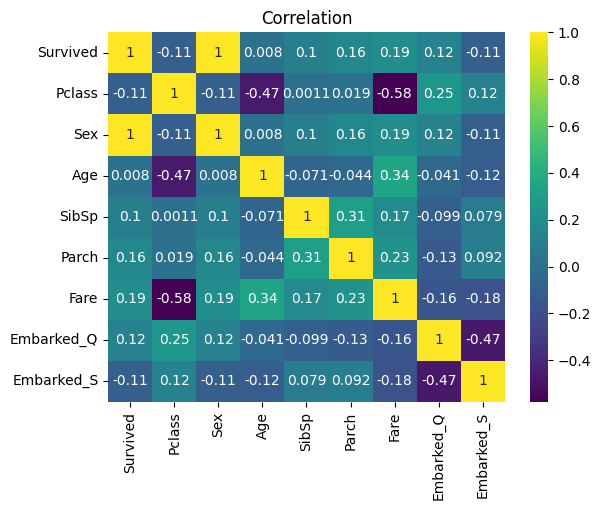

In [15]:
# Let's see the correlation between variables
sns.heatmap(data.corr(), annot=True, cmap='viridis')
plt.title('Correlation')
plt.show()

In [16]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
y_pred = clf.predict(X_test)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [22]:
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 1.0
Confusion Matrix:
[[50  0]
 [ 0 34]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [23]:
# Create a new input data point (features) for prediction
new_passenger = pd.DataFrame({
    'Pclass': [3],       # Passenger class (e.g., 1st, 2nd, 3rd)
    'Sex': [0],          # 0 for male, 1 for female
    'Age': [25],         # Age of the passenger
    'SibSp': [1],        # Number of siblings or spouses aboard
    'Parch': [0],        # Number of parents or children aboard
    'Fare': [7.25],      # Fare paid by the passenger
    'Embarked_Q': [0],   # One-hot encoded 'Embarked' column (e.g., 0 for not embarked at Queenstown)
    'Embarked_S': [1]    # One-hot encoded 'Embarked' column (e.g., 1 for embarked at Southampton)
})

# Feature scaling for the new data point
new_passenger = scaler.transform(new_passenger)

# Make a prediction
prediction = clf.predict(new_passenger)

# Interpret the prediction
if prediction[0] == 0:
    print("The passenger is predicted to not survive.")
else:
    print("The passenger is predicted to survive.")

The passenger is predicted to not survive.
